In [1]:
using Plots
using DelimitedFiles

In [46]:
timming_file = raw"../running_whit_openblas/result_collection_total_timing_data.dat";
timming_matrix = readdlm(timming_file);

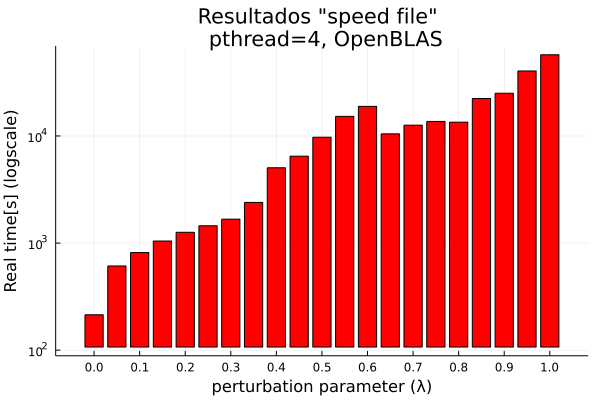

In [53]:
plot(timming_matrix[2:end,1],timming_matrix[2:end,2],seriestype =:bar,color="red",label="",yaxis=:log,xticks=(0.0:0.1:1.0))
plot!(title="Resultados \"speed file\" \n pthread=4, OpenBLAS",xlabel="perturbation parameter (λ)",ylabel="Real time[s] (logscale)")

### Característica de configuraciones simuladas para análisis de performance

Para todos los casos se utilizaron parámetros $\lambda=0.5$ y $V_L=0.9[au]$.

### Tipos de configuraciones con y sin paquete OpenBLAS

Se mantuvieron fijos los siguientes parámetros de performance:

Dentro de `script_run.sh` se utilizó la siguiente configuración para paralelismo en OpenMP y OpenBLAS (según corresponda)
```bash
    # OpenMP
    export OMP_SCHEDULE="auto"
    export OMP_STACKSIZE="512M"
    # OpenBLAS
    export USE_THREAD=0
    export USE_LOCKING=1
```

Dentro de `input_file.inp` se utilizó la siguiente configuración para paralelismo con POSIX threads
```bash
    usepthreads=4
```

+ 01_whit_openblas folder
  + Configuración utilizando OpenBLAS pero con configuración I de paralelismo de OpenMP
    ```bash
        export OMP_NUM_THREADS=1
        export OPENBLAS_NUM_THREADS=4
    ```
+ 02_whit_openblas folder
  + Configuración utilizando OpenBLAS pero con configuración II de paralelismo de OpenMP
    ```bash
        export OMP_NUM_THREADS=4
        export OPENBLAS_NUM_THREADS=1
    ```
+ 03_whit_openblas folder
  + Configuración utilizando OpenBLAS pero con configuración II de paralelismo de OpenMP
    ```bash
        export OMP_NUM_THREADS=4
        export OPENBLAS_NUM_THREADS=4
    ```
+ 04_whitout_openblas folder
  + Configuración sin utilizar OpenBLAS (se tuvo que recompilar mctdh sin linkeo a librería OpenBLAS)
    ```bash
        export OMP_NUM_THREADS=4
        export OPENBLAS_NUM_THREADS=4
    ```

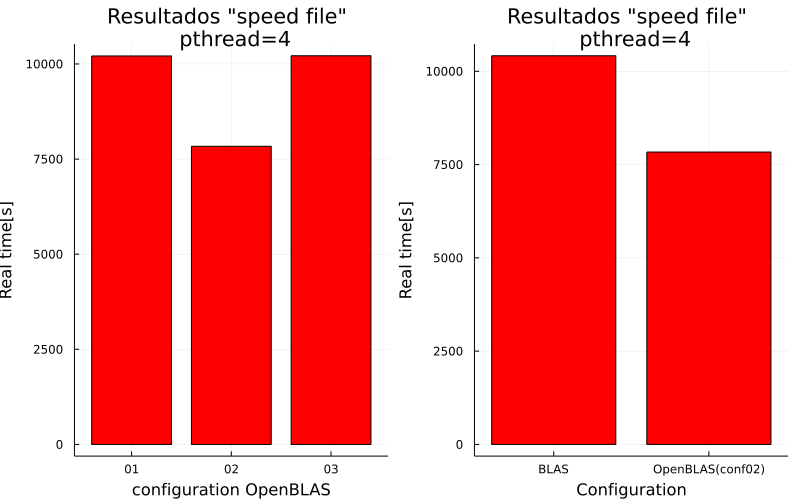

In [35]:
conf = ["01","02","03"]
time = [10211,7836,10216]
plt1 = plot(conf,time,seriestype =:bar,color="red",label="")
plot1 = plot!(plt1,title="Resultados \"speed file\" \n pthread=4",xlabel="configuration OpenBLAS",ylabel="Real time[s]")

conf = ["BLAS","OpenBLAS(conf02)"]
time = [10416,7836]
plt2 = plot(conf,time,seriestype =:bar,color="red",label="")
plot2 = plot!(plt2,title="Resultados \"speed file\" \n pthread=4",xlabel="Configuration",ylabel="Real time[s]")

plot(plot1,plot2,layout=2,size=(800,500))

### Tipos de configuraciones con OpenBLAS aumentando el número de threads

Se mantuvieron fijos los siguientes parámetros de performance:

Dentro de `script_run.sh` se utilizó la siguiente configuración para paralelismo en OpenMP y OpenBLAS
```bash
    # OpenMP
    export OMP_SCHEDULE="auto"
    export OMP_STACKSIZE="512M"
    # OpenBLAS
    export USE_THREAD=0
    export USE_LOCKING=1
```

+ 05_whit_openblas_01pthreads folder
  + Configuración utilizando 1 pthread para paralelismo con POSIX threads
    ```bash
        # dentro de input_file.inp
        usepthreads=4
        # dentro de script_run.sh
        export OMP_NUM_THREADS=1
        export OPENBLAS_NUM_THREADS=1
    ```
+ 06_whit_openblas_02pthreads folder
  + Configuración utilizando 2 pthreads para paralelismo con POSIX threads
    ```bash
        # dentro de input_file.inp
        usepthreads=2
        # dentro de script_run.sh
        export OMP_NUM_THREADS=2
        export OPENBLAS_NUM_THREADS=1
    ```
+ 07_whit_openblas_03pthreads folder
  + Configuración utilizando 3 pthreads para paralelismo con POSIX threads
    ```bash
        # dentro de input_file.inp
        usepthreads=3
        # dentro de script_run.sh
        export OMP_NUM_THREADS=3
        export OPENBLAS_NUM_THREADS=1
    ```
+ 02_whit_openblas folder
  + Configuración utilizando OpenBLAS pero con configuración II de paralelismo de OpenMP
    ```bash
        export OMP_NUM_THREADS=4
        export OPENBLAS_NUM_THREADS=1
    ```

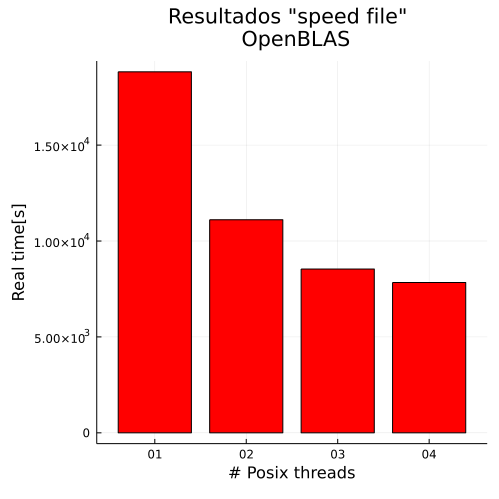

In [24]:
conf = ["01","02","03","04"]
time = [18821,11109,8540,7836]
plot(conf,time,seriestype =:bar,size=(500,500),color="red",label="")
plot!(title="Resultados \"speed file\" \n OpenBLAS",xlabel="# Posix threads",ylabel="Real time[s]")

### Tipos de configuraciones con OpenBLAS cambiando el schedule en la paralelización con OpenMP

Se mantuvieron fijos los siguientes parámetros de performance:

Dentro de `script_run.sh` se utilizó la siguiente configuración para paralelismo en OpenMP y OpenBLAS (según corresponda)
```bash
    # OpenMP
    export OMP_NUM_THREADS=2
    export OMP_STACKSIZE="512M"
    # OpenBLAS
    export OPENBLAS_NUM_THREADS=1
    export USE_THREAD=0
    export USE_LOCKING=1
```

Dentro de `input_file.inp` se utilizó la siguiente configuración para paralelismo con POSIX threads
```bash
    usepthreads=2
```

+ 06_whit_openblas_02pthreads folder
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      export OMP_SCHEDULE="auto"
    ```
+ 08_whit_openblas_01schedule
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      export OMP_SCHEDULE="static,default"
    ```
+ 09_whit_openblas_01schedule
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      export OMP_SCHEDULE="guided"
    ```
+ 10_whit_openblas_01schedule
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      chunksize=128
      export OMP_SCHEDULE="dynamic,${chunksize}"
    ```
+ 11_whit_openblas_01schedule
  + Configuración utilizando OpenBLAS pero con configuración I de schedule para OpenMP
    ```bash
      chunksize=128
      export OMP_SCHEDULE="static,${chunksize}"
    ```

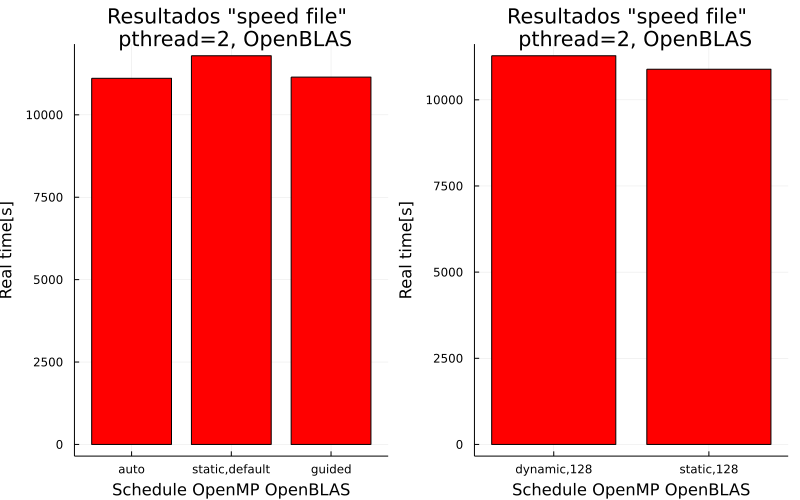

In [3]:
conf = ["auto","static,default","guided"]
time = [11109,11792,11144]
plt1 = plot(conf,time,seriestype =:bar,color="red",label="")
plot1 = plot!(plt1,title="Resultados \"speed file\" \n pthread=2, OpenBLAS",xlabel="Schedule OpenMP OpenBLAS",ylabel="Real time[s]")

conf = ["dynamic,128","static,128"]
time = [11279,10888]
plt2 = plot(conf,time,seriestype =:bar,color="red",label="")
plot2 = plot!(plt2,title="Resultados \"speed file\" \n pthread=2, OpenBLAS",xlabel="Schedule OpenMP OpenBLAS",ylabel="Real time[s]")

plot(plot1,plot2,layout=2,size=(800,500))

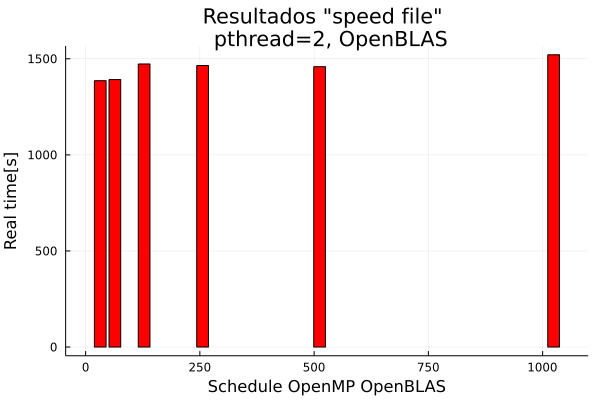

In [8]:
timming_file2 = raw"./12_whit_openblas_04schedule_chunksize/result_collection_total_timing_data.dat";
timming_matrix2 = readdlm(timming_file2);
plot(timming_matrix2[2:end,1],timming_matrix2[2:end,2],seriestype =:bar,color="red",label="")
plot!(title="Resultados \"speed file\" \n pthread=2, OpenBLAS",xlabel="Schedule OpenMP OpenBLAS",ylabel="Real time[s]")

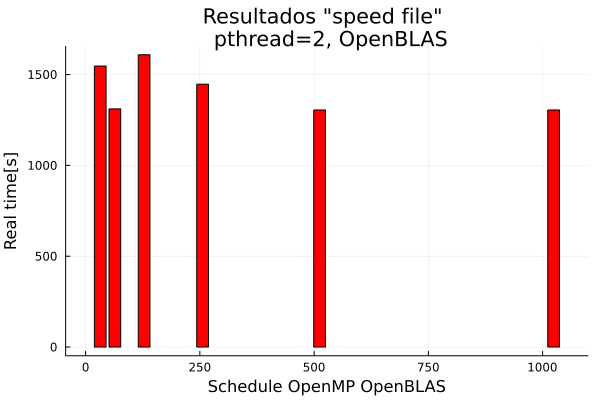

In [2]:
timming_file2 = raw"./13_whit_openblas_03schedule_chunksize/result_collection_total_timing_data.dat";
timming_matrix2 = readdlm(timming_file2);
plot(timming_matrix2[2:end,1],timming_matrix2[2:end,2],seriestype =:bar,color="red",label="")
plot!(title="Resultados \"speed file\" \n pthread=2, OpenBLAS",xlabel="Schedule OpenMP OpenBLAS",ylabel="Real time[s]")